<a href="https://colab.research.google.com/github/amsaravi/ML/blob/main/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [6]:
# @title Default title text
!rm AirlineTweets.csv
!wget -nc https://raw.githubusercontent.com/amsaravi/ML/main/AirlineTweets.csv


rm: cannot remove 'AirlineTweets.csv': No such file or directory
--2024-04-10 12:21:51--  https://raw.githubusercontent.com/amsaravi/ML/main/AirlineTweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/plain]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.03s   

2024-04-10 12:21:52 (120 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



Import required modules
---



In [2]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [4]:
classifier("this show was interesting")

[{'label': 'POSITIVE', 'score': 0.999747097492218}]

In [ ]:
classifier(["this show was interesting","this course is what i needed"])

[{'label': 'POSITIVE', 'score': 0.999747097492218},
 {'label': 'POSITIVE', 'score': 0.9985148310661316}]

Persian Classifier does not seems to have any pipelines provided



In [ ]:
persian_classifier= pipeline("sentiment-analysis", model="persiannlp/mt5-small-parsinlu-sentiment-analysis")

Some weights of MT5ForSequenceClassification were not initialized from the model checkpoint at persiannlp/mt5-small-parsinlu-sentiment-analysis and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
persian_classifier("سلام. این فیلم به شدت مزخرف بود و ارزش دیدن بیش از یک بار رو نداره")

[{'label': 'LABEL_0', 'score': 0.66326904296875}]

In [ ]:
persian_classifier("سلام. بسیار فیلم زیبا و قشنگی بود. صد بار دیدم این فیلم رو")

[{'label': 'LABEL_0', 'score': 0.7160443067550659}]

In [ ]:
persian_classifier("فیلم تا وسط فیلم یعنی دقیقا تا جایی که معلوم میشه بچه های املشی دنبال رضان خیلی خوب و جذاب پیش میره ولی دقیقا از همونجاش سکته میزنه و خلاص...")

[{'label': 'LABEL_0', 'score': 0.6975898742675781}]

RUN the code with GPU




In [ ]:
# check if gpu is available

import torch
torch.cuda.is_available()

True

In [ ]:
#** get the device number **

torch.cuda.current_device()

0

In [ ]:
gpu_classifier = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# non english does not work
gpu_classifier("سلام. بسیار فیلم زیبا و قشنگی بود. صد بار دیدم این فیلم رو")

[{'label': 'NEGATIVE', 'score': 0.5406129360198975}]

**read from csv and run sentiment analysis on it**

In [14]:
df_ = pd.read_csv('AirlineTweets.csv', skiprows=[40,123,155,253,262,263,294,307,320])

In [15]:
df_ = pd.read_csv('AirlineTweets.csv', on_bad_lines='skip')

In [16]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [17]:
df = df_[["airline_sentiment","text"]]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

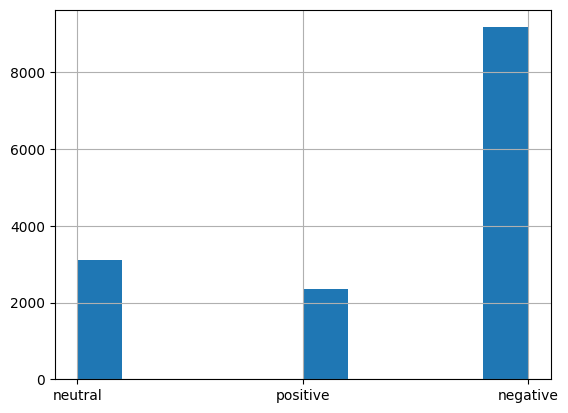

In [18]:
df['airline_sentiment'].hist()

In [19]:
df = df[df.airline_sentiment!="neutral"].copy()

In [20]:
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [21]:
len(df)

11541

In [22]:
target_map={'positive':1, "negative":0 }
df['target'] = df['airline_sentiment'].map(target_map)

In [23]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [26]:
text=df['text'].to_list()
predictions = classifier(text)

In [28]:
predictions

[{'label': 'POSITIVE', 'score': 0.6070854663848877},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854251742362976},
 {'label': 'POSITIVE', 'score': 0.9553210139274597},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245